In [334]:
from selenium import webdriver
import time
import quandl

In [286]:
url = 'https://seekingalpha.com/symbol/TSLA?s=tsla'
# driver = webdriver.Chrome()
driver = webdriver.Firefox()
driver.get(url)

In [287]:
headline_elements = driver.find_elements_by_xpath('//*[@class="feed news"]')
news_elements = headline_elements[0].find_elements_by_xpath('.//*[@class = "symbol_item"]')
# news_elements = headline_elements[0].find_elements_by_xpath('.//*[@class = "symbol_item"]//*[@class = "symbol_article"]')

print(len(news_elements))

15


In [288]:
last_height = driver.execute_script("return document.body.scrollHeight")
print(last_height)

2638


In [289]:
# article_name = []
# article_date = []
# article_author = []

# t_end = time.time() + 10
# i=0
# while time.time() < t_end:
#     try:
#         for news in news_elements:
# #             article_date = news.text
#             article_name.append(news.find_element_by_xpath("./a").text)
#             article_date.append(news.find_element_by_xpath("./div[@class='date_on_by']/span[@class='date']").text)
#             article_author.append(news.find_element_by_xpath("./div[@class='date_on_by with_sentiments']/a").text)
# #             print(article_date, article_name, article_author)
#             i +=1

#         driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
#         time.sleep(1)
# #         news_elements = headline_elements[0].find_elements_by_xpath('//*[@class = "symbol_article"]/div[@class="date_on_by with_sentiments"]/span[@class="date"]')[i:]
#         news_elements = headline_elements[0].find_elements_by_xpath('.//*[@class = "symbol_article"]')[i:]
#     except:
#         break


# driver.quit()

In [290]:
article_name = []
article_date = []
article_author = []
article_comments = []

t_end = time.time() + 30
i=0
while time.time() < t_end:
    try:
        for news in news_elements:
#             article_date = news.text
#             article_name.append(news.find_element_by_xpath("./a").text)
            article_name.append(news.find_element_by_xpath('.//div[@class = "symbol_article"]/a').text)
            article_date.append(news.find_element_by_xpath('.//div[@class="date_on_by"]/span[3]').text)
            article_comments.append(news.find_element_by_xpath('.//span[@class = "comments"]').text)
            i +=1

        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(3)
#         news_elements = headline_elements[0].find_elements_by_xpath('//*[@class = "symbol_article"]/div[@class="date_on_by with_sentiments"]/span[@class="date"]')[i:]
        news_elements = headline_elements[0].find_elements_by_xpath('.//*[@class = "symbol_item"]')[i:]
#         news_elements = headline_elements[0].find_elements_by_xpath('.//*[@class = "symbol_item"]//*[@class = "symbol_article"]')[i:]
    except:
        break
        

driver.quit()

In [291]:
len(article_name), len(article_comments), len(article_date)

(15, 15, 15)

In [292]:
import pandas as pd

In [170]:
df = pd.DataFrame({"date":article_date,"headline":article_name,"comments":article_comments})

In [31]:
# df.to_csv("seeking_alpha.csv", index=False)

In [293]:
df = pd.read_csv("seeking_alpha.csv")

In [294]:
df.head()

,date,headline,author
0,"May, 11, 2020",Tesla Is More Than A Car Maker,The Value Trend
1,"May, 8, 2020",Tesla: World Domination Lies In The Palm Of It...,Louis Stevens
2,"May, 7, 2020","Tesla: The Range Discrepancy, Part II",RD Barris
3,"May, 7, 2020",Tesla: The S&P 500 Battle,Bill Maurer
4,"May, 5, 2020",Why I Sold All My Tesla Shares,Victor Dergunov


In [295]:
df['date'] = pd.to_datetime(df['date'])

In [296]:
df.isnull().sum()

date        0
headline    0
author      0
dtype: int64

In [297]:
df.head()

,date,headline,author
0,2020-05-11,Tesla Is More Than A Car Maker,The Value Trend
1,2020-05-08,Tesla: World Domination Lies In The Palm Of It...,Louis Stevens
2,2020-05-07,"Tesla: The Range Discrepancy, Part II",RD Barris
3,2020-05-07,Tesla: The S&P 500 Battle,Bill Maurer
4,2020-05-05,Why I Sold All My Tesla Shares,Victor Dergunov


In [298]:
import nltk

In [299]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mails\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [300]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

results = []

for headline in df['headline']:
    pol_score = SIA().polarity_scores(headline) # run analysis
    pol_score['headline'] = headline # add headlines for viewing
    results.append(pol_score)

results

[{'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': 'Tesla Is More Than A Car Maker'},
 {'neg': 0.282,
  'neu': 0.493,
  'pos': 0.225,
  'compound': 0.0516,
  'headline': 'Tesla: World Domination Lies In The Palm Of Its Hand'},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': 'Tesla: The Range Discrepancy, Part II'},
 {'neg': 0.394,
  'neu': 0.606,
  'pos': 0.0,
  'compound': -0.3818,
  'headline': 'Tesla: The S&P 500 Battle'},
 {'neg': 0.0,
  'neu': 0.694,
  'pos': 0.306,
  'compound': 0.296,
  'headline': 'Why I Sold All My Tesla Shares'},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': 'Tesla Delivers - But A Tweet Storm Ensues'},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': "Tesla's Illusory Liquidity: An Update And Cash Burn Estimate"},
 {'neg': 0.0,
  'neu': 0.756,
  'pos': 0.244,
  'compound': 0.4404,
  'headline': 'Tesla Shows Q1 Profit, Remains Expensive But Is Still A Buy

In [301]:
df['score'] = pd.DataFrame(results)['compound']

In [302]:
df.head(10)

,date,headline,author,score
0,2020-05-11,Tesla Is More Than A Car Maker,The Value Trend,0.0000
1,2020-05-08,Tesla: World Domination Lies In The Palm Of It...,Louis Stevens,0.0516
2,2020-05-07,"Tesla: The Range Discrepancy, Part II",RD Barris,0.0000
3,2020-05-07,Tesla: The S&P 500 Battle,Bill Maurer,-0.3818
4,2020-05-05,Why I Sold All My Tesla Shares,Victor Dergunov,0.2960
5,2020-05-04,Tesla Delivers - But A Tweet Storm Ensues,Value Ninja,0.0000
6,2020-05-04,Tesla's Illusory Liquidity: An Update And Cash...,Montana Skeptic,0.0000
7,2020-05-01,"Tesla Shows Q1 Profit, Remains Expensive But I...",Cohan Chew,0.4404
8,2020-05-01,Tesla: Q1 Credit Sales Fuel Beats,Bill Maurer,0.3818
9,2020-04-30,Tesla: Some Cash Concerns,Dan Stringer,0.0000


In [303]:
grouped_df = df[['date', 'headline','score']].groupby(['date']).sum()

In [304]:
grouped_df = grouped_df.reset_index()

In [305]:
grouped_df.head(10)

,date,score
0,2018-09-21,-0.2040
1,2018-09-24,1.2757
2,2018-09-25,0.0000
3,2018-09-26,0.4404
4,2018-09-27,-0.2265
5,2018-09-28,-0.7837
6,2018-10-01,-0.6808
7,2018-10-02,0.9490
8,2018-10-03,-0.1027
9,2018-10-04,0.1779


In [306]:
min(grouped_df.index), max(grouped_df.index)

(0, 359)

In [349]:
tsla_yahoo = pd.read_csv("TSLA_yahoo.csv")

In [350]:
tsla_yahoo.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-21,297.700012,300.579987,295.369995,299.100006,299.100006,5050500
1,2018-09-24,298.480011,303.000000,293.579987,299.679993,299.679993,4843000
2,2018-09-25,300.000000,304.600006,296.500000,300.989990,300.989990,4481700
3,2018-09-26,301.910004,313.890015,301.109985,309.579987,309.579987,7843200
4,2018-09-27,312.899994,314.959991,306.910004,307.519989,307.519989,8509100


In [351]:
tsla_yahoo['Date'] = pd.to_datetime(tsla_yahoo['Date'])

In [352]:
tsla_yahoo.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)

In [353]:
tsla_yahoo['daily_return'] = tsla_yahoo['Adj Close']/tsla_yahoo['Adj Close'].shift(1) - 1

In [312]:
#lagging lexicon scores by 1 day


In [354]:
grouped_df['lagged_score'] = grouped_df['score'].shift(1)


In [355]:
grouped_df.head()

,date,score,lagged_score
0,2018-09-21,-0.2040,NaN
1,2018-09-24,1.2757,-0.2040
2,2018-09-25,0.0000,1.2757
3,2018-09-26,0.4404,0.0000
4,2018-09-27,-0.2265,0.4404


In [404]:
joined = pd.merge(grouped_df,tsla_yahoo, left_on='date', right_on='Date', sort=True)

In [405]:
joined.head()

,date,score,lagged_score,Date,Adj Close,daily_return
0,2018-09-21,-0.2040,NaN,2018-09-21,299.100006,NaN
1,2018-09-24,1.2757,-0.2040,2018-09-24,299.679993,0.001939
2,2018-09-25,0.0000,1.2757,2018-09-25,300.989990,0.004371
3,2018-09-26,0.4404,0.0000,2018-09-26,309.579987,0.028539
4,2018-09-27,-0.2265,0.4404,2018-09-27,307.519989,-0.006654


In [406]:
joined.fillna(0, inplace=True) 

In [407]:
joined[(joined['lagged_score']>=0.4) | (joined['lagged_score']<=-0.4)].head()

,date,score,lagged_score,Date,Adj Close,daily_return
2,2018-09-25,0.0000,1.2757,2018-09-25,300.989990,0.004371
4,2018-09-27,-0.2265,0.4404,2018-09-27,307.519989,-0.006654
6,2018-10-01,-0.6808,-0.7837,2018-10-01,310.700012,0.173471
7,2018-10-02,0.9490,-0.6808,2018-10-02,301.019989,-0.031156
8,2018-10-03,-0.1027,0.9490,2018-10-03,294.799988,-0.020663


In [408]:
joined[['lagged_score','daily_return']].corr()

,lagged_score,daily_return
lagged_score,1.000000,0.101953
daily_return,0.101953,1.000000


In [409]:
import seaborn as sns

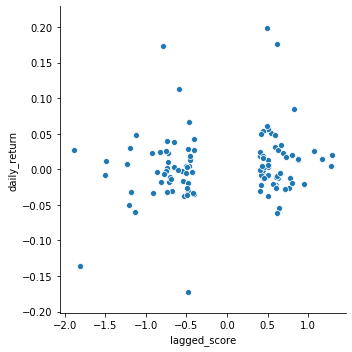

In [410]:
sns.relplot(x='lagged_score',y='daily_return',data=joined[(joined['lagged_score']>=0.4) | (joined['lagged_score']<=-0.4)]);

In [411]:
joined.head()

,date,score,lagged_score,Date,Adj Close,daily_return
0,2018-09-21,-0.2040,0.0000,2018-09-21,299.100006,0.000000
1,2018-09-24,1.2757,-0.2040,2018-09-24,299.679993,0.001939
2,2018-09-25,0.0000,1.2757,2018-09-25,300.989990,0.004371
3,2018-09-26,0.4404,0.0000,2018-09-26,309.579987,0.028539
4,2018-09-27,-0.2265,0.4404,2018-09-27,307.519989,-0.006654


In [412]:
joined['Date'] = pd.to_datetime(joined['Date'])
joined['month'] = pd.DatetimeIndex(joined['Date']).month
joined['year'] = pd.DatetimeIndex(joined['Date']).year
joined['woy'] = pd.DatetimeIndex(joined['Date']).weekofyear
joined['dow'] = pd.DatetimeIndex(joined['Date']).dayofweek

In [413]:
joined = joined.drop(['Date'],axis=1)

In [417]:
joined.head()

,date,score,lagged_score,Adj Close,daily_return,month,year,woy,dow,previous_Adj Close
1,2018-09-24,1.2757,-0.2040,299.679993,0.001939,9,2018,39,0,299.100006
2,2018-09-25,0.0000,1.2757,300.989990,0.004371,9,2018,39,1,299.679993
3,2018-09-26,0.4404,0.0000,309.579987,0.028539,9,2018,39,2,300.989990
4,2018-09-27,-0.2265,0.4404,307.519989,-0.006654,9,2018,39,3,309.579987
5,2018-09-28,-0.7837,-0.2265,264.769989,-0.139015,9,2018,39,4,307.519989


In [415]:
joined['previous_Adj Close']  = joined['Adj Close'].shift(1)

In [416]:
joined.dropna(inplace=True)

In [374]:
joined = joined.set_index('date')

In [418]:
joined = joined.drop(['Adj Close', 'date','score'],axis=1)

In [419]:
joined.head()

,lagged_score,daily_return,month,year,woy,dow,previous_Adj Close
1,-0.2040,0.001939,9,2018,39,0,299.100006
2,1.2757,0.004371,9,2018,39,1,299.679993
3,0.0000,0.028539,9,2018,39,2,300.989990
4,0.4404,-0.006654,9,2018,39,3,309.579987
5,-0.2265,-0.139015,9,2018,39,4,307.519989


In [422]:
X = joined.drop(['daily_return'],axis=1)
y = joined['daily_return']

In [435]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [423]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=23)

In [425]:
len(X_train), len(X_test), len(y_train), len(y_test)

(259, 65, 259, 65)

In [429]:
scaler = RobustScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [431]:
clf = LinearRegression()
clf.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [433]:
clf.score(X_test,y_test)

-520954.1562872219

In [436]:
pred = clf.predict(X_test)

In [437]:
r2_score(y_test,pred)

-520954.1562872219

In [441]:
import xgboost as xgb

In [443]:
dtrain = xgb.DMatrix(X_train_scaled)
dtest = xgb.DMatrix(X_test_scaled)

In [446]:
clf = xgb.XGBRegressor()

In [448]:
clf.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [450]:
pred = clf.predict(X_test_scaled)

In [451]:
r2_score(y_test,pred)

-0.7956805916286847

XGBoost performs much better than linear reression but still it is not good enough to be able to predict the stockprices